##  Theory:
Proteins binding to DNA protect nearby DNA fragments from nuclease digestion.

Around the protein binding site, the fragment size and fragment center positions show a specific pattern:

Shorter fragments accumulate closer to the center (protected region).

Longer fragments span a wider region around the center.

This results in a "V" shape when plotted:

X-axis (X): Distance between fragment center and binding site center (C2 - C1).

Y-axis (Y): Fragment length (Column10 - Column9).

Z-axis (Z): Count of fragments at each (X, Y) coordinate.



## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import gzip
fragment_counts = defaultdict(int)

## Read and proces the compressed maped.BED.gz file

In [ ]:
with gzip.open('mapped.bed.gz', 'rt') as f:
    for line in f:
        cols = line.strip().split('\t')
        center1 = (int(cols[2]) + int(cols[3])) // 2 
        center2 = (int(cols[8]) + int(cols[9])) // 2 
        relative_pos = center2 - center1  
        frag_length = int(cols[9]) - int(cols[8]) 
        fragment_counts[(relative_pos, frag_length)] += 1


## Constructing the Heatmap

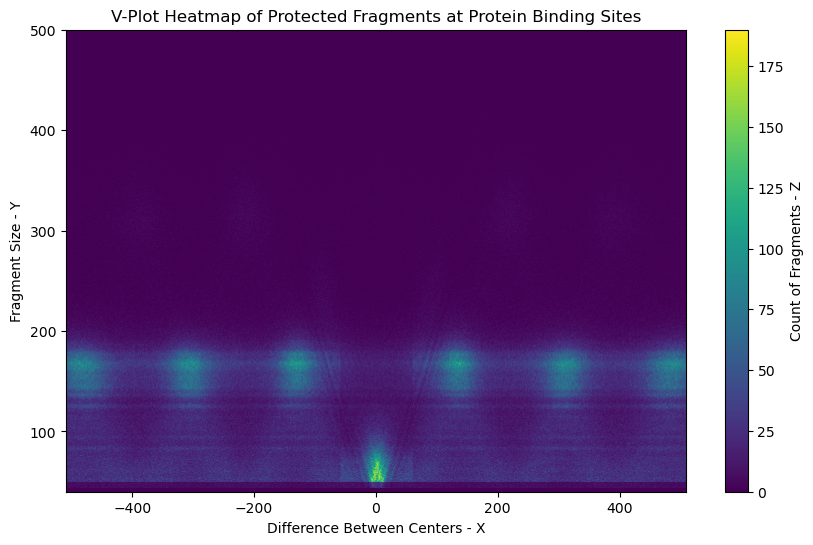

In [18]:

rel_pos_vals = []
frag_len_vals = []
count_vals = []
for (relative_pos, frag_length), count in fragment_counts.items():
    rel_pos_vals.append(relative_pos)
    frag_len_vals.append(frag_length)
    count_vals.append(count)

rel_pos_unique = sorted(set(rel_pos_vals))
frag_len_unique = sorted(set(frag_len_vals))

pos_index = {pos: i for i, pos in enumerate(rel_pos_unique)}
len_index = {length: i for i, length in enumerate(frag_len_unique)}
heatmap = np.zeros((len(frag_len_unique), len(rel_pos_unique)))
for relative_pos, frag_length, count in zip(rel_pos_vals, frag_len_vals, count_vals):
    heatmap[len_index[frag_length], pos_index[relative_pos]] = count
plt.figure(figsize=(10, 6))
plt.imshow(
    heatmap, aspect='auto', cmap='viridis', origin='lower',
    extent=[min(rel_pos_unique), max(rel_pos_unique), min(frag_len_unique), max(frag_len_unique)]
)
plt.title('V-Plot Heatmap of Protected Fragments at Protein Binding Sites')
plt.colorbar(label='Count of Fragments - Z')
plt.xlabel('Difference Between Centers - X')
plt.ylabel('Fragment Size - Y')
plt.savefig('v_heatmap.png')
plt.show()
plt.close()

## Analysis of V-plot

#### 1) V-Plot Representation: The heatmap shows DNA fragment distribution around protein binding sites, forming a V-shape.
#### 2) Distant Fragments: Fragments with centers far from the binding site need greater length to overlap it, creating the V's sloping arms.
#### Proximate Fragments: Fragments centered near the binding site can be shorter while still overlapping, narrowing the V.
#### V-Tip Formation: The minimum fragment length that overlaps the binding site marks the V's tip, typically at the center (relative position ≈ 0).
#### Count Intensity: Color intensity reflects fragment counts, highlighting the V-pattern of protection by the protein.